# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.16799999624490738


When finished, you can close the environment.

In [6]:
# env.close()

### 4. Learning Algorithm

#### 1. Selection of Learning Algorithms
In this project, Deep Deterministic Policy Gradients (DDPG) was used to solve Unity Reacher Environment. DDPG is one of the DRL algorithms capable of solving continous action spaces.

#### 2. Description of DDPG
- The actor network approximates the optimal policy deterministically (best believed action). 
- The critic evaluates the optimal action value function using the best believed action given by the actor network.
- DDPG also uses a `repĺay buffer` where experience tuples are stored.

#### 3. Hyper-parameters

| Parameter Name      | Description           | Value  |
| ------------- |:-------------:| -----:|
| BUFFER_SIZE      | Size of the replay buffer | 1e5 |
| BATCH_SIZE      | Mini-batch size      |   128 |
| GAMMA ($\gamma$) | Discount factor      |   0.99 |
| TAU ($\tau$) |  	 coefficient for soft update of target| 1e-3 |
| LR|Actor learning rate | 1e-4 |
| LR| Critic learning rate| 1e-4 |
| WEIGHT_DECAY| L2 weight decay|0|

In [7]:
from agent import DDPG_agent
import numpy as np
import torch

from collections import namedtuple, deque

In [8]:
agents = DDPG_agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)
n_episodes = 1000
print_every = 10

In [9]:
import time
def ddpg(n_episodes=2000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agents.reset()
        score = np.zeros(num_agents)
        for t in range(max_t):
            action = agents.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agents.step(state, action, rewards, next_state, dones)
            state = next_state
            score += rewards
            if np.any(dones):
                print('\tSteps: ', t)
                break 
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.3f}'.format(i_episode, 
                                                                          np.mean(scores_deque), 
                                                                          np.mean(score)))
        average_score = np.mean(scores_deque)
        if i_episode % print_every == 20 or average_score > 30:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, average_score))
            torch.save(agents.actor_local.state_dict(), 'reacher_checkpoint_actor.pth')
            torch.save(agents.critic_local.state_dict(), 'reacher_checkpoint_critic.pth') 
            if average_score > 30:
                break
    return scores


In [10]:
score = ddpg()

Episode 1	Average Score: 0.68	Score: 0.679
Episode 2	Average Score: 0.68	Score: 0.671
Episode 3	Average Score: 0.75	Score: 0.903
Episode 4	Average Score: 0.75	Score: 0.739
Episode 5	Average Score: 0.81	Score: 1.044
Episode 6	Average Score: 0.84	Score: 1.008
Episode 7	Average Score: 0.92	Score: 1.369
Episode 8	Average Score: 1.01	Score: 1.694
Episode 9	Average Score: 1.06	Score: 1.429
Episode 10	Average Score: 1.13	Score: 1.715
Episode 11	Average Score: 1.20	Score: 1.956
Episode 12	Average Score: 1.26	Score: 1.874
Episode 13	Average Score: 1.35	Score: 2.493
Episode 14	Average Score: 1.48	Score: 3.097
Episode 15	Average Score: 1.59	Score: 3.244
Episode 16	Average Score: 1.70	Score: 3.332
Episode 17	Average Score: 1.84	Score: 4.023
Episode 18	Average Score: 2.07	Score: 6.066
Episode 19	Average Score: 2.24	Score: 5.168
Episode 20	Average Score: 2.46	Score: 6.645
Episode 21	Average Score: 2.73	Score: 8.107
Episode 22	Average Score: 3.13	Score: 11.610
Episode 23	Average Score: 3.53	Score: 12

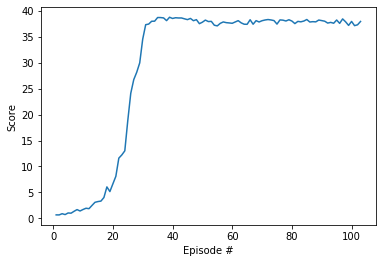

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(score)+1), score)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [12]:
agents.actor_local.load_state_dict(torch.load('reacher_checkpoint_actor.pth', map_location='cpu'))
agents.critic_local.load_state_dict(torch.load('reacher_checkpoint_critic.pth', map_location='cpu'))

env_info = env.reset(train_mode=False)[brain_name]        
states = env_info.vector_observations                  
scores = np.zeros(num_agents)                          

for i in range(1000):
    actions = agents.act(states, add_noise=False)                    
    env_info = env.step(actions)[brain_name]        
    next_states = env_info.vector_observations        
    rewards = env_info.rewards                        
    dones = env_info.local_done                 
    scores += rewards                         
    states = next_states                              
    if np.any(dones):                              
        break

In [13]:
env.close()